<a href="https://www.kaggle.com/code/junedism/spaceship-titanic-exploratory-data-analysis?scriptVersionId=94419639" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

In [2]:
# Color Setting

colors = ['#8EBAD9', '#FFF56D']
tcolor_dict = {
    True : "#8EBAD9",
    False : "#FFF56D"
}
mycmp = LinearSegmentedColormap.from_list("MyCmp", ['#8EBAD9', '#FFFFFF', '#FFF56D'], N=100)

## Loading the Data

#### Load the Spaceship Titanic Data

In [3]:
data_train = pd.read_csv("../input/spaceship-titanic/train.csv")

# Let's take a look at the data
data_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


## Understanding the Data
#### Let's do some simple Exploratory Data Analysis

In [4]:
# Let's see the shape of the data
print("The data has a dimension of", data_train.shape[0], "Rows, and", data_train.shape[1], "columns")

The data has a dimension of 8693 Rows, and 14 columns


>### Data Field Descriptions
>
>- `PassengerId` - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
>- `HomePlanet` - The planet the passenger departed from, typically their planet of permanent residence.
>- `CryoSleep` - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
>- `Cabin` - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
>- `Destination` - The planet the passenger will be debarking to.
>- `Age` - The age of the passenger.
>- `VIP` - Whether the passenger has paid for special VIP service during the voyage.
>- `RoomService`, `FoodCourt`, `ShoppingMall`, `Spa`, `VRDeck` - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
>- `Name` - The first and last names of the passenger.
>- `Transported` - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

In [5]:
# Basic information about the data
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [6]:
data_train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [7]:
# Check if the data has missing value
data_train.isnull().sum().sort_values()

PassengerId       0
Transported       0
Age             179
RoomService     181
Destination     182
FoodCourt       183
Spa             183
VRDeck          188
Cabin           199
Name            200
HomePlanet      201
VIP             203
ShoppingMall    208
CryoSleep       217
dtype: int64

### Let's create a dataframe to see better representation of the magnitude of the missing data

In [8]:
# Calculate the percentage of missing data from each column
nan_ratio = []
for col in data_train.columns:
    nan_item = []
    nan_item.append(col)
    nan_item.append(data_train[col].isnull().sum())
    nan_item.append(str(round(100 * data_train[col].isnull().sum() / data_train.shape[0], 2)) + '%')
    nan_ratio.append(nan_item)
    
df_nan = pd.DataFrame(nan_ratio, columns=["Column", "NaN count", "NaN ratio"]).set_index("Column")
df_nan = df_nan.sort_values("NaN ratio", ascending=False)
df_nan.astype(object).T

Column,CryoSleep,ShoppingMall,VIP,HomePlanet,Name,Cabin,VRDeck,FoodCourt,Spa,Destination,RoomService,Age,PassengerId,Transported
NaN count,217,208,203,201,200,199,188,183,183,182,181,179,0,0
NaN ratio,2.5%,2.39%,2.34%,2.31%,2.3%,2.29%,2.16%,2.11%,2.11%,2.09%,2.08%,2.06%,0.0%,0.0%


> ### Findings
>* All columns except `PassengerId` and `Transported` has some degree of missing values problem
>* The percentage of missing values are generally low, with magnitude ranging from 2 - 2.5%

### Class Imbalance Check!
Let's create a pie chart to see if the data we have has a class imbalance problem

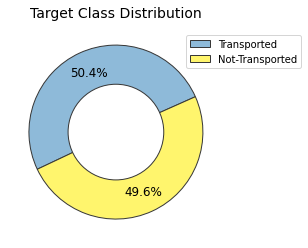

In [9]:
# Plot a pie chart to check if we have class imbalance problem

fig, ax = plt.subplots(figsize=(6,4))
ax.pie(x = data_train["Transported"].value_counts(), autopct="%1.1f%%",
        pctdistance=.75, startangle=24, textprops={"fontsize":12},
        colors=colors, wedgeprops={'edgecolor':'#383838'});
# ax.text(1.5,.1,"There are approximately same amount of positive and negative class,\n so we don't have class imbalance problem.",
#         size=15)
ax.set_title("Target Class Distribution", fontdict={'fontsize':14})
ax.legend(['Transported', 'Not-Transported'], bbox_to_anchor=(.8, .77))

centre_circle = plt.Circle((0,0),0.55,fc='white', ec='#383838')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.show()

> ### Findings
>* There are approximately same amount of Positive (Transported) class and Negative (Not-Transported) class, so we don't have class imbalance problem

<br>
We need to dive deeper into the data to unearth more insight from the data and see which categories of the passengers who got transported and who don't.

First let's try to analyze the features in the data

### Age Distribution
Let's see the age distribution among the passengers

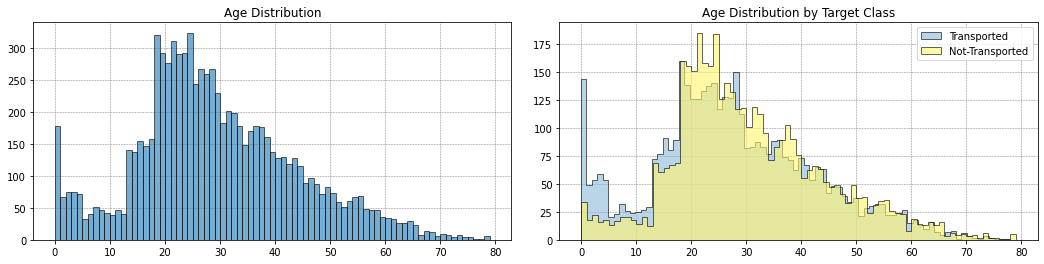

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(18, 4))
fig.subplots_adjust(wspace=.1)
bins = np.int8(data_train["Age"].max())

ax[0].hist(data_train["Age"], bins=bins, edgecolor="k", alpha=.6, zorder=2)
ax[0].grid(linestyle='--', linewidth=0.5, color='gray', zorder=0)
ax[0].set_title("Age Distribution")

ax[1].hist(data_train[data_train["Transported"]]["Age"], bins=bins, alpha=.6, histtype='stepfilled', edgecolor='k',
        color=colors[0], zorder=2, label="Transported")
ax[1].hist(data_train[~data_train["Transported"]]["Age"], bins=bins, alpha=.6, histtype='stepfilled', edgecolor='k',
        color=colors[1], zorder=2, label="Not-Transported")
ax[1].grid(linestyle='--', linewidth=0.5, color='gray', zorder=0)
ax[1].set_title("Age Distribution by Target Class")
ax[1].legend()

plt.show();

> ### Findings
>* Most passengers are in the age range of 20 to 29, therefore this age range has the most transported passengers
>* From the histogram plot on the right we can see each class Age Distribution are pretty much on top of each other, so we can say that the amount of Transported passengers are equally distributed between each age range. Therefore it seems that there is little to no correlation between Age and Transported
>* There are considerable amount of transported passengers that in the age range of 0 to 1

#### Let's double check our findings

In [11]:
# Check which age range has the most passengers and most transported passengers
age_list = []
for i in range(0, 80, 10):
    item = []
    item.append("%d-%d" % (i, i+9))
    item.append(data_train[(data_train["Age"] >= i) & (data_train["Age"] < i+10)]["Age"].count())
    item.append(data_train[(data_train["Transported"]) & (data_train["Age"] >= i) & (data_train["Age"] < i+10)]["Age"].count())
    item.append(data_train[(~data_train["Transported"]) & (data_train["Age"] >= i) & (data_train["Age"] < i+10)]["Age"].count())
    age_list.append(item)
    
age_list = pd.DataFrame(age_list, columns=["AgeRange", "Count", "TransCount", "notTransCount"]).set_index("AgeRange").transpose()
age_list

AgeRange,0-9,10-19,20-29,30-39,40-49,50-59,60-69,70-79
Count,679,1479,2762,1735,1048,557,208,46
TransCount,483,788,1296,796,531,275,99,20
notTransCount,196,691,1466,939,517,282,109,26


In [12]:
# Check the correlation of Age and Transported feature
data_cluster = data_train[["Age", "Transported"]].corr()
print("Correlation coefficient : {:.4f}".format(data_cluster.loc['Age','Transported']))

Correlation coefficient : -0.0750


The `Age` and `Transported` has a correlation value very near to zero, which indicates that there is very little correlation between the two feature. We might as well dropping the `Age` column since it won't give us any information about the Target variable

### Understanding the Relationship between HomePlanet, Destination and Transported

In [13]:
# Create dataframe grouped by HomePlanet and Transported
y_home = data_train.groupby(['HomePlanet', 'Transported'])['PassengerId'].count().reset_index()
y_home.rename(columns={'PassengerId' : 'Count'}, inplace=True)

# Create dataframe grouped by Destination and Transported
y_dest = data_train.groupby(['Destination', 'Transported'])['PassengerId'].count().reset_index()
y_dest.rename(columns={'PassengerId' : 'Count'}, inplace=True)

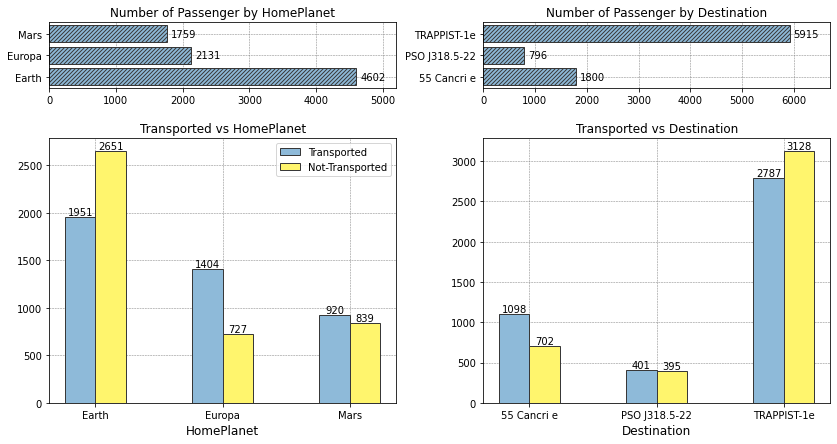

In [14]:
### Ignore the messy code, i'll fix it later ###

x = np.arange(3)
width=.24

gs_kw = dict(width_ratios=[1,1], height_ratios=[.4, 1.6])
fig, ax = plt.subplots(2, 2, figsize=(14,7), gridspec_kw=gs_kw)
fig.subplots_adjust(wspace=.25, hspace=.3)

# ---------------------------------------------------------------------------------------
bar1 = ax[0,0].barh(x, y_home.groupby(["HomePlanet"])["Count"].sum(), zorder=2, hatch='//////', ec="#383838", color=tcolor_dict[True])
ax[0,0].bar_label(bar1, padding=4)
ax[0,0].set_yticks(x, list(y_home["HomePlanet"].unique()))
ax[0,0].set_xlim(right=5200)
ax[0,0].grid(linestyle='--', linewidth=0.5, color='gray', zorder=0)
ax[0,0].set_title("Number of Passenger by HomePlanet")

# ---------------------------------------------------------------------------------------
bar1 = ax[0,1].barh(x, y_dest.groupby(["Destination"])["Count"].sum(), zorder=2, hatch='//////', ec="#383838", color=tcolor_dict[True])
ax[0,1].bar_label(bar1, padding=4)
ax[0,1].set_yticks(x, list(y_dest["Destination"].unique()))
ax[0,1].set_xlim(right=6700)
ax[0,1].grid(linestyle='--', linewidth=0.5, color='gray', zorder=0)
ax[0,1].set_title("Number of Passenger by Destination")

# ---------------------------------------------------------------------------------------
# HomePlanet vs Transported barchart
bar1 = ax[1, 0].bar(x-.12, y_home[y_home["Transported"]]["Count"], width, zorder=2, color=tcolor_dict[True], ec="#383838")
bar2 = ax[1, 0].bar(x+.12, y_home[~y_home["Transported"]]["Count"], width, zorder=2, color=tcolor_dict[False], ec="#383838")
ax[1, 0].bar_label(bar1)
ax[1, 0].bar_label(bar2)
ax[1, 0].set_xticks(x, list(y_home["HomePlanet"].unique()))
ax[1, 0].set_xlabel("HomePlanet", size=12)
ax[1, 0].grid(linestyle='--', linewidth=0.5, color='gray', zorder=0)
ax[1, 0].set_title("Transported vs HomePlanet")
ax[1, 0].legend(["Transported", "Not-Transported"])

# ---------------------------------------------------------------------------------------
# Destination vs Transported barchart
bar1 = ax[1, 1].bar(x-.12, y_dest[y_dest["Transported"]]["Count"], width, zorder=2, color=tcolor_dict[True], ec="#383838")
bar2 = ax[1, 1].bar(x+.12, y_dest[~y_dest["Transported"]]["Count"], width, zorder=2, color=tcolor_dict[False], ec="#383838")
ax[1, 1].bar_label(bar1)
ax[1, 1].bar_label(bar2)
ax[1, 1].set_xticks(x, list(y_dest["Destination"].unique()))
ax[1, 1].set_xlabel("Destination", size=12)
ax[1, 1].grid(linestyle='--', linewidth=0.5, color='gray', zorder=0)
ax[1, 1].set_title("Transported vs Destination")


plt.show();

> ### Findings
>* Most of the passengers came from planet Earth
>* Relative to other Planet, passengers from Earth are the most Transported
>* Most of the passengers are leaving to TRAPPIST-1e
>* Passengers leaving to TRAPPIST-1e are the most Transported

In [15]:
# Create dataframe grouped by HomePlanet, Destination and Transported

y_homedest = data_train.groupby(['HomePlanet', 'Destination', 'Transported'])['PassengerId'].count().reset_index()
y_homedest['HomeDest'] = y_homedest['HomePlanet'] + ' to ' + y_homedest['Destination']
y_homedest.rename(columns={'PassengerId' : 'Count'}, inplace=True)
y_homedest = y_homedest.sort_values(["Count", "HomePlanet"], ascending=True)

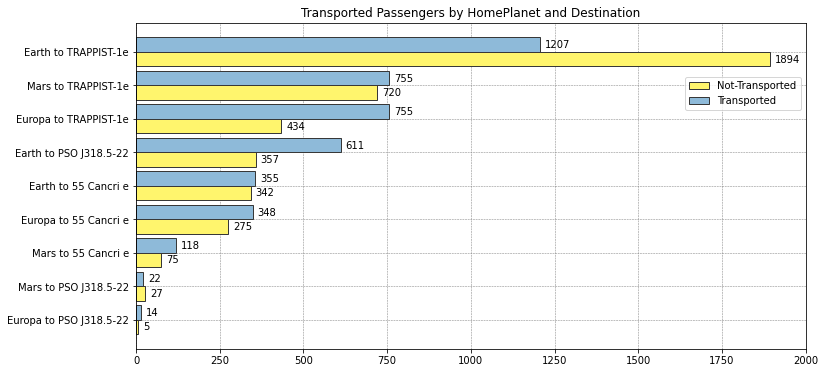

In [16]:
y = np.arange(stop=18, step=2)
height = .86


fig, ax = plt.subplots(figsize=(12, 6))

bar1 = ax.barh(y-.43, y_homedest[~y_homedest["Transported"]]["Count"], color=colors[1], ec="#383838", height=height,
               zorder=2, label="Not-Transported")
bar2 = ax.barh(y+.43, y_homedest[y_homedest["Transported"]]["Count"], color=colors[0], ec="#383838", height=height,
               zorder=2, label="Transported")
ax.bar_label(bar1, padding=5)
ax.bar_label(bar2, padding=5)
ax.set_yticks(y, y_homedest["HomeDest"].unique())
ax.grid(linestyle='--', linewidth=0.5, color='gray', zorder=0)
ax.set_title("Transported Passengers by HomePlanet and Destination")
ax.set_xlim(right=2000)
ax.legend(bbox_to_anchor=(1, .85))

plt.show();

### Understanding the Relationship between CryoSleep, VIP and Transported

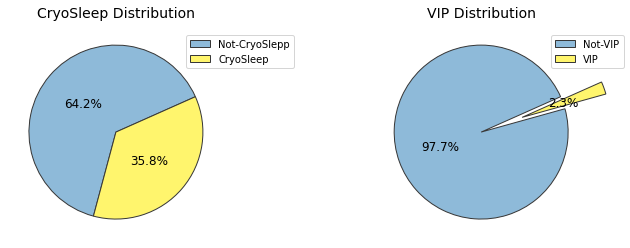

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(12,4))
ax[0].pie(x = data_train["CryoSleep"].value_counts(), autopct="%1.1f%%",
        pctdistance=.5, startangle=24, textprops={"fontsize":12},
        colors=colors, wedgeprops={'edgecolor':'#383838'});
ax[0].set_title("CryoSleep Distribution", fontdict={'fontsize':14})
ax[0].legend(['Not-CryoSlepp', 'CryoSleep'], bbox_to_anchor=(.8, .77))


ax[1].pie(x = data_train["VIP"].value_counts(), autopct="%1.1f%%",
        pctdistance=.5, startangle=24, textprops={"fontsize":12},
        colors=colors, wedgeprops={'edgecolor':'#383838'}, explode=[0,.5]);
ax[1].set_title("VIP Distribution", fontdict={'fontsize':14})
ax[1].legend(['Not-VIP', 'VIP'], bbox_to_anchor=(.8, .77))

plt.show()

> ### Findings
>* About two-thirds of the passengers are enjoying their trip without going into cryosleep state
>* A very little amount of passengers are having the benefit of the VIP service

#### Let's see how those two features correlate to the Transported feature

In [18]:
y_cs = data_train.groupby(["CryoSleep", "Transported"])["PassengerId"].count().reset_index()
y_cs.rename(columns={"PassengerId" : "Count"}, inplace=True)

y_vip = data_train.groupby(["VIP", "Transported"])["PassengerId"].count().reset_index()
y_vip.rename(columns={"PassengerId" : "Count"}, inplace=True)

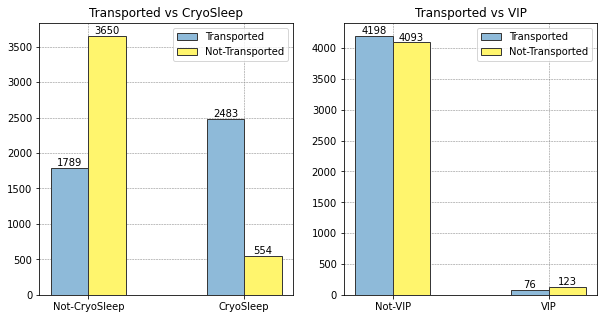

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
x = np.arange(2)

# plot
bar1 = ax[0].bar(x-.12, y_cs[y_cs["Transported"]]["Count"], width=width, label="Transported",
                 color=tcolor_dict[True], ec="#383838", zorder=2)
bar2 = ax[0].bar(x+.12, y_cs[~y_cs["Transported"]]["Count"], width=width, label="Not-Transported",
                 color=tcolor_dict[False], ec="#383838", zorder=2)
ax[0].bar_label(bar1)
ax[0].bar_label(bar2)
ax[0].set_xticks(x, ["Not-CryoSleep", "CryoSleep"])
ax[0].grid(linestyle='--', linewidth=0.5, color='gray', zorder=0)
ax[0].set_title("Transported vs CryoSleep")
ax[0].legend()

bar1 = ax[1].bar(x-.12, y_vip[y_vip["Transported"]]["Count"], width=width, label="Transported",
                 color=tcolor_dict[True], ec="#383838", zorder=2)
bar2 = ax[1].bar(x+.12, y_vip[~y_vip["Transported"]]["Count"], width=width, label="Not-Transported",
                 color=tcolor_dict[False], ec="#383838", zorder=2)
ax[1].bar_label(bar1)
ax[1].bar_label(bar2)
ax[1].set_xticks(x, ["Not-VIP", "VIP"])
ax[1].grid(linestyle='--', linewidth=0.5, color='gray', zorder=0)
ax[1].set_title("Transported vs VIP")
ax[1].legend()

plt.show();

> ### Findings
>* It seems passengers in the cryosleep state are more likely to be transpoted, and vice versa
>* Whether passengers have VIP benefit or not, they have about the same chance to be transported

In [20]:
# TBD

# threshold = 0.0
# data_cluster = data_train.corr()
# mask = data_cluster.where(abs(data_cluster) >= threshold).isna()
# sns.heatmap(data_cluster, annot=True, mask=mask, cmap=mycmp);